In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/차량비전시스템/src/img_hw2/peppers.jpg')

## Question 1. RGB 이미지를 세 개의 채널(R, G, B)로 분리한 뒤 다시 합치는 프로그 램을 작성하시오 (opencv 활용 가능)

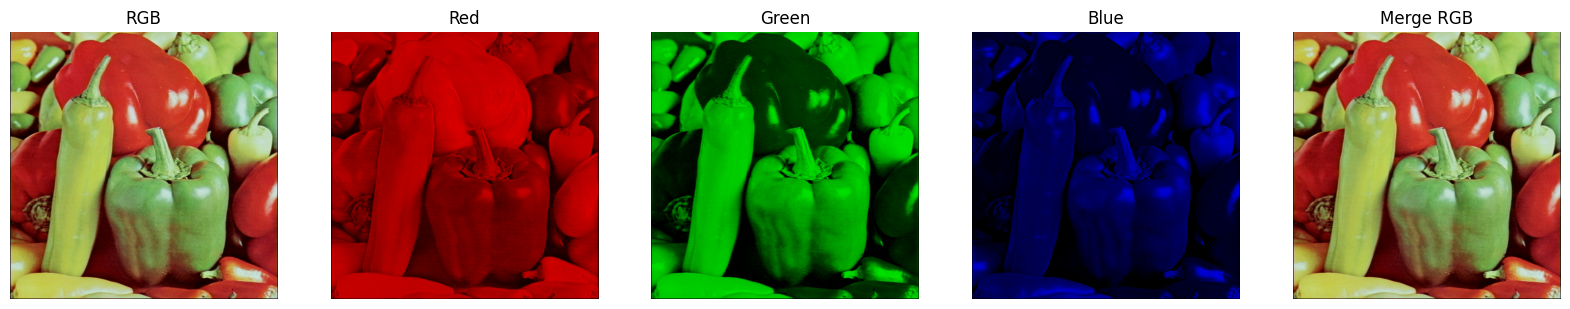

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # RGB -> BGR
Red_img, Green_img, Blue_img = cv2.split(RGB_img) # 채널분리
plt.figure(figsize=(20,20))

plt.subplot(1, 5, 1)
plt.title('RGB')
plt.imshow(RGB_img)
plt.axis("off")

#Red Chennel
RGB_img[:, :, 0] = Red_img
RGB_img[:, :, 1] = 0
RGB_img[:, :, 2] = 0 
plt.subplot(1, 5, 2)
plt.title('Red')
plt.imshow(RGB_img)
plt.axis("off")

#Green Chennel
RGB_img[:, :, 0] = 0
RGB_img[:, :, 1] = Green_img
RGB_img[:, :, 2] = 0 
plt.subplot(1, 5, 3)
plt.title('Green')
plt.imshow(RGB_img)
plt.axis("off")

#Blue Chennel
RGB_img[:, :, 0] = 0
RGB_img[:, :, 1] = 0
RGB_img[:, :, 2] = Blue_img 
plt.subplot(1, 5, 4)
plt.title('Blue')
plt.imshow(RGB_img)
plt.axis("off")

#RGB 채널 합치기
merge_img = cv2.merge([Red_img, Green_img, Blue_img])
plt.subplot(1, 5, 5)
plt.title('Merge RGB')
plt.imshow(merge_img)
plt.axis("off")

plt.show()

## Question 2. peppers.jpg 이미지 파일 활용
### 1) R, G, B 각 채널별로 전역임계값을 구하시오

(-0.5, 511.5, 511.5, -0.5)

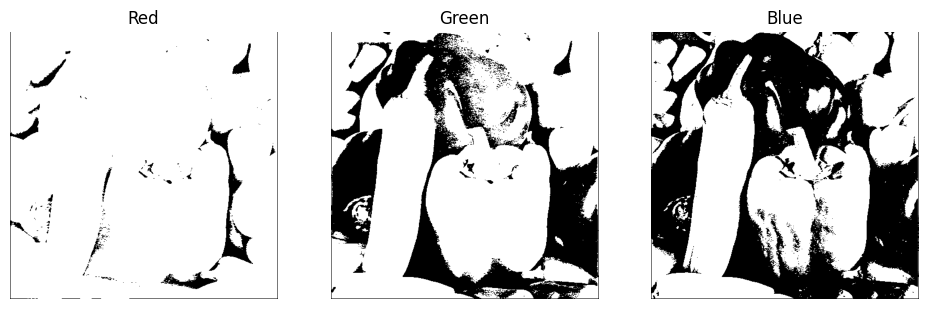

In [ ]:
# 전역 임계값 50으로 이미지 처리
R_ret, R_thresh_cv = cv2.threshold(Red_img, 50, 255, cv2.THRESH_BINARY) 
G_ret, G_thresh_cv = cv2.threshold(Green_img, 50, 255, cv2.THRESH_BINARY) 
B_ret, B_thresh_cv = cv2.threshold(Blue_img, 50, 255, cv2.THRESH_BINARY) 

plt.figure(figsize=(20,20))

plt.subplot(1, 5, 1)
plt.title('Red')
plt.imshow(R_thresh_cv, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.title('Green')
plt.imshow(G_thresh_cv, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.title('Blue')
plt.imshow(B_thresh_cv, cmap='gray')
plt.axis("off")

### 2) Gray scale로 변환한 후 전역임계값을 구하시오

In [ ]:
# color영상을 gray영상으로 만들기
gray_img = cv2. cvtColor(img, cv2.COLOR_BGR2GRAY) 
# 초기 임계값, 이전 임계값 저장 변수, 종료 조건 임계값 설정
T1 = 127 
T2 = 0
T0 = 1
# 임계값 적용 후 이진 영상을 담을 기억 장소 생성
output_img = np.zeros((gray_img.shape[0], gray_img.shape[1]))

# 각 그룹별 평균값으로 새로운 입계값 계산하는 한수
def threshold_update(h, M, img, output, T1): #saturation함수로 정의하기
  sum1 = 0
  count1 = 1 # 분모가 0이 되는 것을 방지하기 위해
  sum2 = 0
  count2 = 1 # 분모가 0이 되는 것을 방지하기 위해
  for h in range(img.shape[0]): 
    for w in range(img.shape[1]):
      # 그룹별 픽셀 총합 계산
        if(output[h,w] == 255):
          sum1 = sum1 + img[h,w]
          count1 = count1 + 1
        else:
          sum2 = sum2+ img[h,w]
          count2 = count2 + 1
  # 그룹별 픽셀 평균 계산
  avel = sum1 / count1
  ave2 = sum2 / count2
  # 평균으로 새로운 임계값 계산
  T2 = np.int32(avel+ave2)/2
  print('전역 임계값: ',T2)
  return T2

#1) 영상 초기 임계값 적용 하기
for h in range(gray_img.shape[0]): 
  for w in range(gray_img.shape[1]):
    if(gray_img[h,w] > T1):
      output_img[h,w] = 255 
    else:
      output_img[h,w] = 0
#2) 종료 조건을 만족할 때 까지 계속 반복
while True:
#새로운 임계값 생성을 위한 함수 호출
  T2 = threshold_update(gray_img.shape[0], gray_img.shape[1], gray_img, output_img, T1)
  #새로운 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1 - T2) < T0):
    # 종료 조건을 만족하면 새로운 임계값으로 영상 이진화 후 출력
    for h in range (gray_img.shape[0]): 
      for w in range (gray_img.shape[1]):
        if(gray_img[h,w] > T2):
          output_img[h,w] = 255 
        else:
          output_img[h,w] = 0
    break
  #종료 조건을 만족하지 않는다면
  else:
    # 새로운 임계값으로 다시 이진화 작업
    T1 = T2
    for h in range (gray_img.shape[0]): 
      for w in range (gray_img.shape[1]):
        if(gray_img[h,w] > T1):
          output_img[h,w] = 255 
        else:
          output_img[h,w] = 0

전역 임계값:  120.0
전역 임계값:  117.5
전역 임계값:  116.5
전역 임계값:  116.0


### 3) 2)에서 얻은 전역임계값을 기준으로 영상을 이진화 하시오

(-0.5, 511.5, 511.5, -0.5)

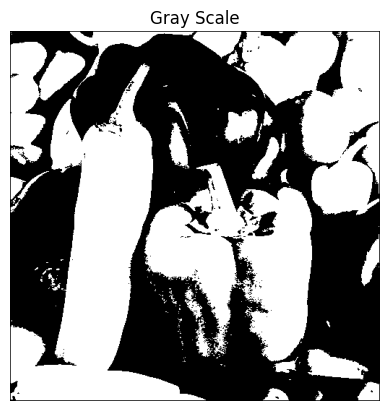

In [ ]:
plt.title('Gray Scale')
plt.imshow(output_img, cmap='gray')
plt.axis("off")

## Question 3. peppers.jpg 이미지 활용
### 1) 이미지의 블록 개수를 25개로 나눈 후 적응적 임계값을 구하시오

In [ ]:
dst = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 2)

In [ ]:
gray_img = cv2. cvtColor(img, cv2.COLOR_BGR2GRAY) 
#가로세로 블록의 개수 5 * 5 = 25
N = 5

#블록 당 가로와 세로 크기 계산
dimh = np.int32(gray_img.shape[0] / N) 
dimw = np.int32(gray_img.shape[1] / N)

#연산에서 제외될 영상 가장자리 크기 계산
dh_rest = np.int32(gray_img.shape[0] % N)
dw_rest = np.int32(gray_img.shape[1] % N)

# 임계값 적용 후 이진 영상을 담을 기억 장소 생성
mean_img = np.zeros((N, N)) #블록의 평균값 저장 배열
ave_output_img = np.zeros((gray_img.shape[0], gray_img.shape[1]))

# 각 블록의 평균값 계산을 위한 함수
def mean_function(img, dimh, dimw, h, w):
  count = 1
  sum = 0
  ave = 0
  for y in range(h, h + dimh): 
    for x in range(w, w + dimw):
      sum = sum + img[y, x]
      count = count + 1
  # 블록별 픽셀 평균 계산
  ave = np.int32(sum/count)
  return ave

th = [] 

#각 블록의 평균값 계산
for h in range(0, img. shape[0] - dh_rest, dimh):
  for w in range(0, img.shape[1] - dw_rest, dimw):
    if (h+dimh < img.shape[0] and w+dimh < img.shape[1]):
      th = mean_function(gray_img, dimh, dimw, h, w)
      mean_img[np.int32(h/dimh), np.int32(w/dimw)] = th

#각 블록에 대해 임계값 적용 및 이진화 작업 수행
for h in range(0, gray_img.shape[0] - dh_rest): 
  for w in range(0, gray_img.shape[1] - dw_rest):
    if(gray_img[h,w] >= mean_img[np.int32(h/dimh), np.int32(w/dimw)]):
      ave_output_img[h,w] = 255
    else:
      ave_output_img[h,w] = 0

print('적응형 임계값: ', th)

적응형 임계값:  94


## 2) 적응적 임계값을 구한 결과(아래 3가지 방법)를 기준으로 각 블록을 이진화 한 결과를 나타내시오
### a. 블록 안의 픽셀값들의 평균값을 이용할 경우에 대한 결과

(-0.5, 511.5, 511.5, -0.5)

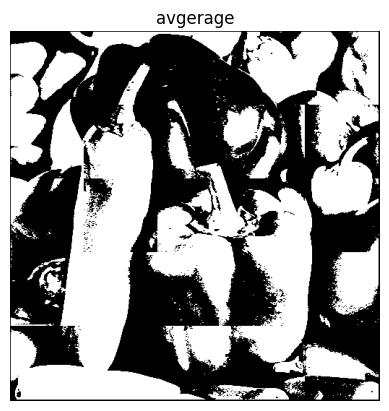

In [ ]:
plt.title('avgerage')
plt.imshow(ave_output_img, cmap='gray')
plt.axis("off")

### b. 블록 안의 픽셀값들의 중간값을 이용할 경우에 대한 결과

In [ ]:
gray_img = cv2. cvtColor(img, cv2.COLOR_BGR2GRAY) 
#가로세로 블록의 개수 5 * 5 = 25
N = 5

#블록 당 가로와 세로 크기 계산
dimh = np.int32(gray_img.shape[0] / N) 
dimw = np.int32(gray_img.shape[1] / N)

#연산에서 제외될 영상 가장자리 크기 계산
dh_rest = np.int32(gray_img.shape[0] % N)
dw_rest = np.int32(gray_img.shape[1] % N)

# 임계값 적용 후 이진 영상을 담을 기억 장소 생성
mean_img = np.zeros((N, N)) #블록의 평균값 저장 배열
mid_output_img = np.zeros((gray_img.shape[0], gray_img.shape[1]))

# 각 블록의 중간값 계산을 위한 함수
def mean_function(img, dimh, dimw, h, w):
  count = 0
  block = []
  for y in range(h, h + dimh): 
    for x in range(w, w + dimw):
      block.append(img[y, x])
  # 블록별 픽셀 평균 계산
  return np.median(block)

th = []

#각 블록의 중간값 계산
for h in range(0, img. shape[0] - dh_rest, dimh):
  for w in range(0, img.shape[1] - dw_rest, dimw):
    if (h+dimh < img.shape[0] and w+dimh < img.shape[1]):
      th = mean_function(gray_img, dimh, dimw, h, w)
      mean_img[np.int32(h/dimh), np.int32(w/dimw)] = th

#각 블록에 대해 임계값 적용 및 이진화 작업 수행
for h in range(0, gray_img.shape[0] - dh_rest): 
  for w in range(0, gray_img.shape[1] - dw_rest):
    if(gray_img[h,w] >= mean_img[np.int32(h/dimh), np.int32(w/dimw)]):
      mid_output_img[h,w] = 255
    else:
      mid_output_img[h,w] = 0

print('적응형 임계값: ', th)

적응형 임계값:  84.0


(-0.5, 511.5, 511.5, -0.5)

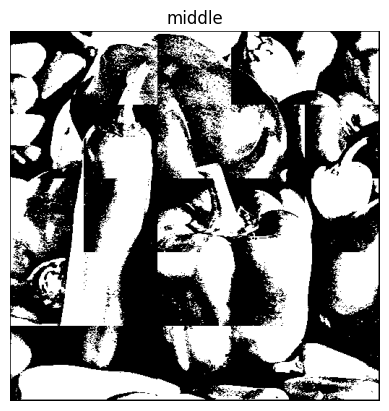

In [ ]:
plt.title('middle')
plt.imshow(mid_output_img, cmap='gray')
plt.axis("off")

### c. 블록 안의 픽셀값들의 최대와 최소의 평균을 이용할 경우에 대한 결과

In [ ]:
gray_img = cv2. cvtColor(img, cv2.COLOR_BGR2GRAY) 
#가로세로 블록의 개수 5 * 5 = 25
N = 5

#블록 당 가로와 세로 크기 계산
dimh = np.int32(gray_img.shape[0] / N) 
dimw = np.int32(gray_img.shape[1] / N)

#연산에서 제외될 영상 가장자리 크기 계산
dh_rest = np.int32(gray_img.shape[0] % N)
dw_rest = np.int32(gray_img.shape[1] % N)

# 임계값 적용 후 이진 영상을 담을 기억 장소 생성
mean_img = np.zeros((N, N)) #블록의 평균값 저장 배열
ave2_output_img = np.zeros((gray_img.shape[0], gray_img.shape[1]))

# 각 블록의 (최대값 + 최소값)의 평균값 계산을 위한 함수
def mean_function(img):
  min = np.max(img)
  max = np.max(img)
  return (min + max) / 2

th = []

#각 블록의 중간값 계산
for h in range(0, img. shape[0] - dh_rest, dimh):
  for w in range(0, img.shape[1] - dw_rest, dimw):
    if (h+dimh < img.shape[0] and w+dimh < img.shape[1]):
      th = mean_function(gray_img)
      mean_img[np.int32(h/dimh), np.int32(w/dimw)] = th

#각 블록에 대해 임계값 적용 및 이진화 작업 수행
for h in range(0, gray_img.shape[0] - dh_rest): 
  for w in range(0, gray_img.shape[1] - dw_rest):
    if(gray_img[h,w] >= mean_img[np.int32(h/dimh), np.int32(w/dimw)]):
      ave2_output_img[h,w] = 255
    else:
      ave2_output_img[h,w] = 0

print('적응형 임계값: ', th)

<ipython-input-99-37846a408609>:21: RuntimeWarning: overflow encountered in ubyte_scalars
  return (min + max) / 2


적응형 임계값:  127.0


(-0.5, 511.5, 511.5, -0.5)

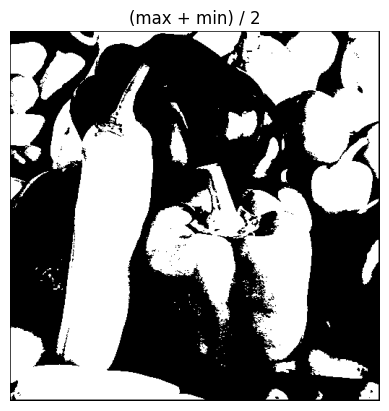

In [ ]:
plt.title('(max + min) / 2')
plt.imshow(ave2_output_img, cmap='gray')
plt.axis("off")

## Question 4. MOT16-1.png 이미지 활용
### 1) R/G/B 각 채널별 히스토그램 분포를 나타내시오

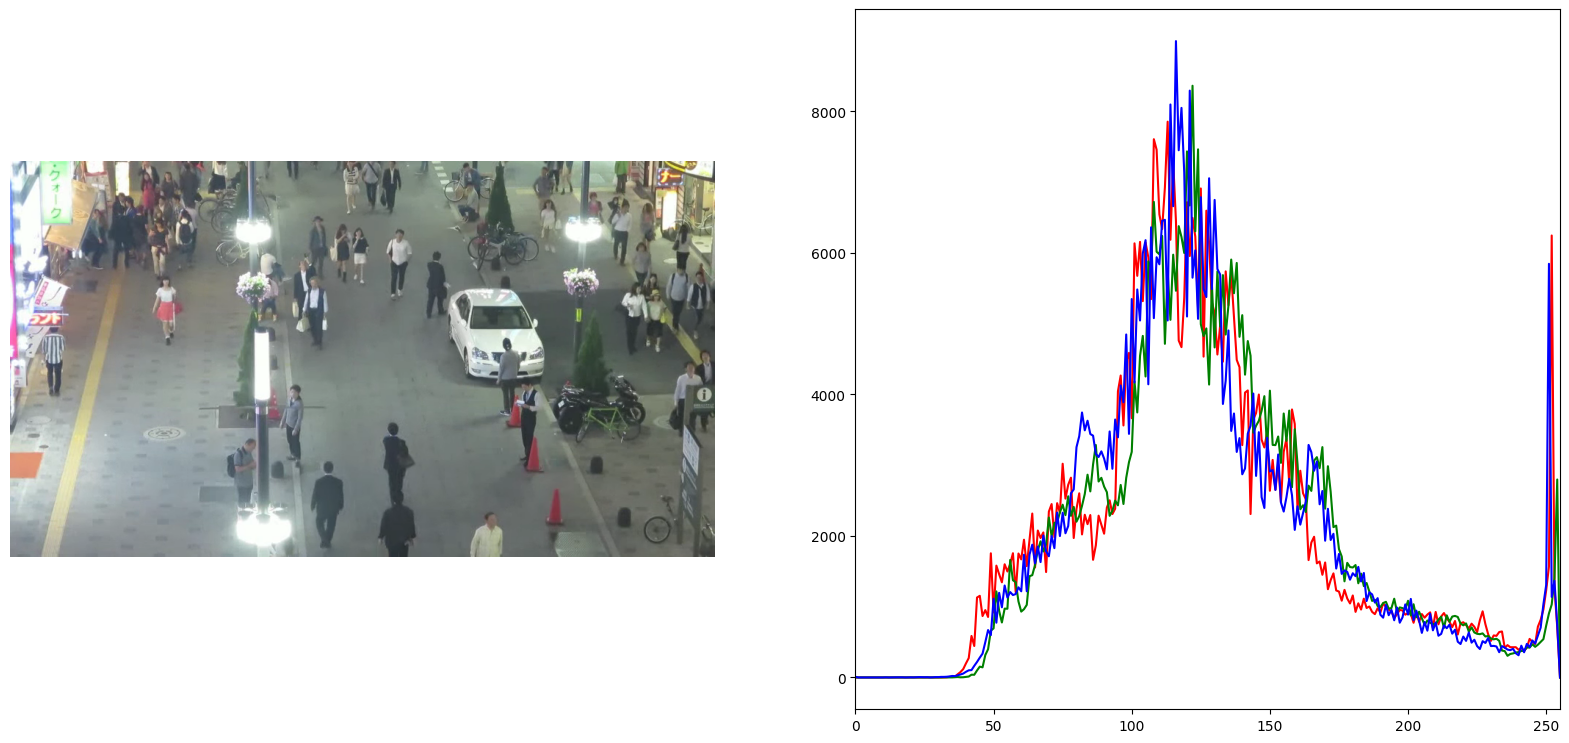

In [ ]:
img2 = cv2.imread('/content/gdrive/MyDrive/차량비전시스템/src/img_hw2/MOT16-1.png')
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#RGB 채널 분리
R_img2, G_img2, B_img2 = cv2.split(RGB_img2)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(RGB_img2)
plt.axis("off")

# 히스토그램 출력, 채널은 0으로 표시
hist = cv2.calcHist([R_img2], [0], None, [256], [0, 255])
plt.subplot(2, 2, 2)
plt.plot(hist, color='r')
plt.xlim([0, 255])
hist = cv2.calcHist([G_img2], [0], None, [256], [0, 255])
plt.plot(hist, color='g')
plt.xlim([0, 255])
hist = cv2.calcHist([B_img2], [0], None, [256], [0, 255])
plt.plot(hist, color='b')
plt.xlim([0, 255])
plt.show()

### 2) gray scale로 변환한 후 히스토그램 분포를 나타내시오

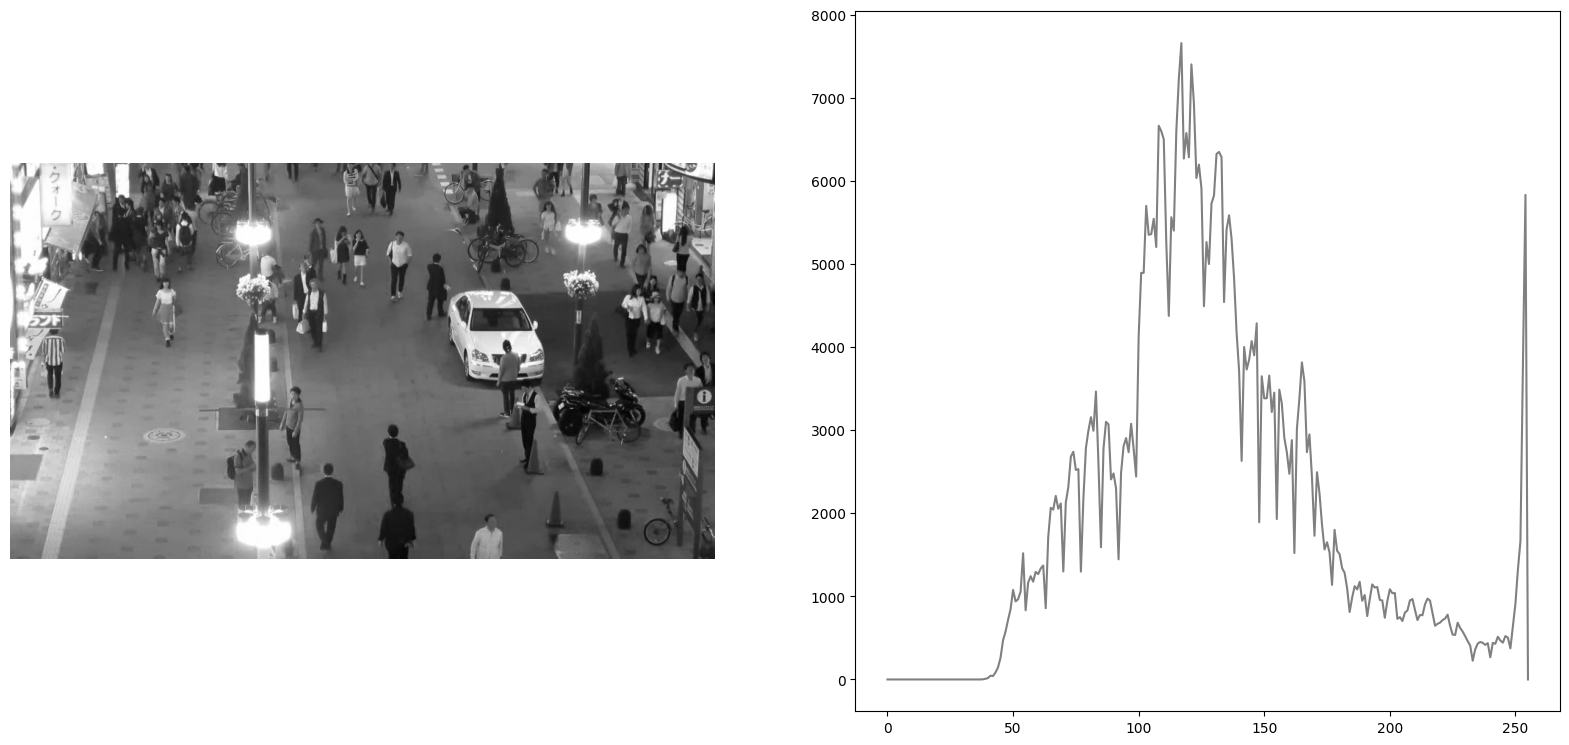

In [ ]:
GRAY_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(GRAY_img2, cmap='gray')
plt.axis("off")

# 히스토그램 출력, 채널은 0으로 표시
hist = cv2.calcHist([GRAY_img2], [0], None, [256], [0, 255])
plt.subplot(2, 2, 2)
plt.plot(hist, color='gray')

### 3) 히스토그램 스트레칭을 적용한 결과의 이미지와 스트래칭 적용 후의 히스토그램 분포 그래프를 나타내시오


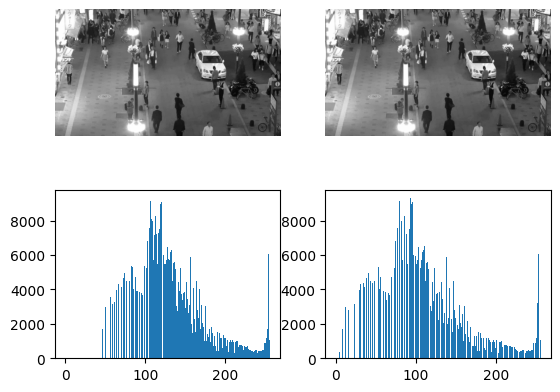

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/차량비전시스템/src/img_hw2/MOT16-1.png', cv2.IMREAD_GRAYSCALE)
out = img.copy()
height, width = img.shape
high = img.max()
low = img.min()
for i in range(height):
  for j in range(width):
    out[i][j]=((img[i][j]-low) * 255 / (high-low))

plt.figure()
plt.subplot(2,2,1),plt.axis("off"),plt.imshow(img,cmap='gray')
plt.subplot(2,2,2),plt.axis("off"),plt.imshow(out,cmap='gray')
plt.subplot(2,2,3),plt.hist(img.ravel(), 256, [0,256]) 
plt.subplot(2,2,4),plt.hist(out.ravel(), 256, [0,256]) 
plt.show()

### 4) 히스토그램 평활화를 적용한 결과의 이미지와 평활화 후의 히스토그램 분포 그래프를 나타내시오

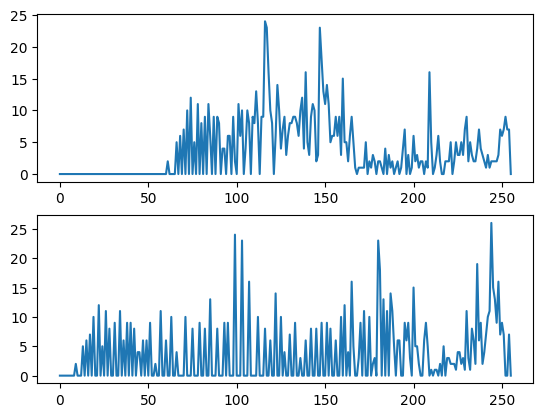

In [ ]:
img2 = cv2.equalizeHist(img)
dst = np.hstack((img,img2)) # 영상 옆으로 쌇기 cv2_imshow(dst)

plt.figure() 
img_hist=cv2.calcHist(img,[0],None,[256],[0,255]) 
plt.subplot(2,1,1), plt.plot(img_hist) 
img2_hist=cv2.calcHist(img2,[0],None,[256],[0,255]) 
plt.subplot(2,1,2), plt.plot(img2_hist)
plt.show()

## Question 5. Copy of Picture1.png 와 Copy of Picture2.png 활용하여 아래 문제들의 결과 이미지를 출력하오

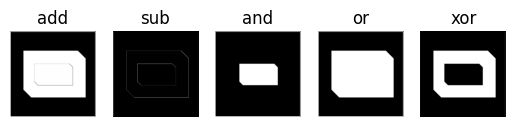

In [ ]:
pic1 = cv2.imread('/content/gdrive/MyDrive/차량비전시스템/src/img_hw2/Copy of Picture1.png')
pic2 = cv2.imread('/content/gdrive/MyDrive/차량비전시스템/src/img_hw2/Copy of Picture2.png')
RGB_pic1 = cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)
RGB_pic2 = cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB)
output_pic = cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)

R_pic1, G_pic1, B_pic1 = cv2.split(RGB_pic1)
R_pic2, G_pic2, B_pic2 = cv2.split(RGB_pic2)

R_plus=np.zeros((RGB_pic1.shape[0], RGB_pic1.shape[1]), dtype=np.ubyte)
G_plus=np.zeros((RGB_pic1.shape[0], RGB_pic1.shape[1]), dtype=np.ubyte)
B_plus=np.zeros((RGB_pic1.shape[0], RGB_pic1.shape[1]), dtype=np.ubyte)

# 덧샘 연산
add = pic1 + pic2
plt.subplot(1, 5, 1)
plt.title('add')
plt.imshow(add)
plt.axis("off")

# 뺄샘 연산
sub = pic1 - pic2
plt.subplot(1, 5, 2)
plt.title('sub')
plt.imshow(sub)
plt.axis("off")

# and 연산
def saturation(value):
  if(value > 255):
    value = 255;
  return value

# for문 돌며 and 연산
for h in range(RGB_pic1.shape[0]):
  for w in range(RGB_pic1.shape[1]):
    R_plus[h, w] = saturation(np.int32(R_pic1[h, w])& np.int32(R_pic2[h, w]))
    G_plus[h, w] = saturation(np.int32(G_pic1[h, w])& np.int32(G_pic2[h, w]))
    B_plus[h, w] = saturation(np.int32(B_pic1[h, w])& np.int32(B_pic2[h, w]))

output_pic[:, :, 0] = R_plus
output_pic[:, :, 1] = G_plus
output_pic[:, :, 2] = B_plus
plt.subplot(1, 5, 3)
plt.title('and')
plt.imshow(output_pic)
plt.axis("off")

# or 연산
# for문 돌며 or
for h in range(RGB_pic1.shape[0]):
  for w in range(RGB_pic1.shape[1]):
    R_plus[h, w] = saturation(np.int32(R_pic1[h, w])| np.int32(R_pic2[h, w]))
    G_plus[h, w] = saturation(np.int32(G_pic1[h, w])| np.int32(G_pic2[h, w]))
    B_plus[h, w] = saturation(np.int32(B_pic1[h, w])| np.int32(B_pic2[h, w]))

output_pic[:, :, 0] = R_plus
output_pic[:, :, 1] = G_plus
output_pic[:, :, 2] = B_plus
plt.subplot(1, 5, 4)
plt.title('or')
plt.imshow(output_pic)
plt.axis("off")

# xor 연산
# for문 돌며 or
for h in range(RGB_pic1.shape[0]):
  for w in range(RGB_pic1.shape[1]):
    R_plus[h, w] = saturation(np.int32(R_pic1[h, w])^ np.int32(R_pic2[h, w]))
    G_plus[h, w] = saturation(np.int32(G_pic1[h, w])^ np.int32(G_pic2[h, w]))
    B_plus[h, w] = saturation(np.int32(B_pic1[h, w])^ np.int32(B_pic2[h, w]))

output_pic[:, :, 0] = R_plus
output_pic[:, :, 1] = G_plus
output_pic[:, :, 2] = B_plus
plt.subplot(1, 5, 5)
plt.title('xor')
plt.imshow(output_pic)
plt.axis("off")

plt.show()